In [ ]:
import numpy as np 
from numpy import random 
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
def view_samples(samples, m, n):
  fig, axes = plt.subplots(figsize=(10, 10), nrows = m, ncols = n, sharey = True, sharex = True)
  for ax, img in zip(axes.flatten(), samples):
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    im = ax.imshow(1 - img.reshape((2, 2)), cmap='Greys_r')
  return fig, axes

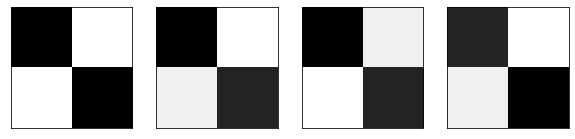

In [ ]:
faces = [np.array([1,0,0,1]),
         np.array([0.9,0.1,0.2,0.8]),
         np.array([0.9,0.2,0.1,0.8]),
         np.array([0.8,0.1,0.2,0.9]),
         np.array([0.8,0.2,0.1,0.9])]
    
_ = view_samples(faces, 1, 4)

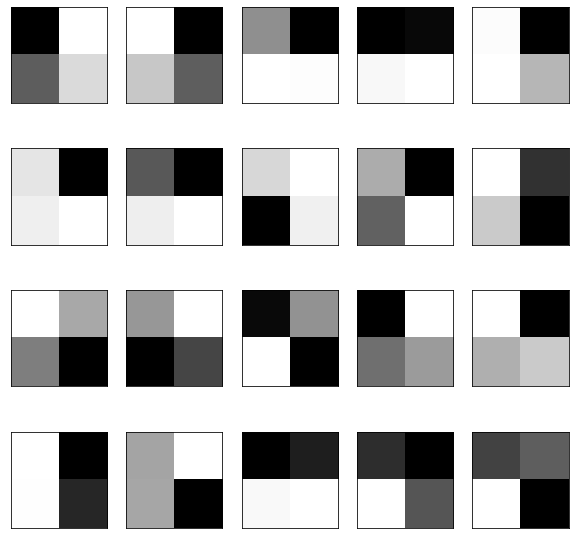

In [ ]:
noise = [np.random.randn(2,2) for i in range (20)]
def generate_random_image():
  return [np.random.random(), np.random.random(), np.random.random(), np.random.random()]

_ = view_samples(noise, 4, 5)

In [ ]:
def sigmoid(x):
  return np.exp(x) / (1.0 + np.exp(x))

In [ ]:
class Discriminator():
  def __init__(self):
    self.weights = np.array([np.random.normal() for i in range(4)])
    self.bias = np.random.normal()
  
  def forward(self, x):
    return sigmoid(np.dot(x, self.weights) + self.bias)
  
  def error_from_image(self, image):
    prediction = self.forward(image)
    return -np.log(prediction)

  def derivatives_from_image(self, image):
    prediction = self.forward(image)
    derivative_weights = -image * (1 - prediction)
    derivative_bias = -(1 - prediction)
    return derivative_weights, derivative_bias
  
  def update_from_image(self, image):
    ders = self.derivatives_from_image(image)
    self.weights -= learning_rate * ders[0]
    self.bias -= learning_rate * ders[1]

  def error_from_noise(self, noise):
    prediction = self.forward(noise)
    return -np.log(1 - prediction)

  def derivatives_from_noise(self, noise):
    prediction = self.forward(noise)
    derivative_weights = noise * prediction
    derivative_bias = prediction
    return derivative_weights, derivative_bias

  def update_from_noise(self, noise):
    ders = self.derivatives_from_noise(noise)
    self.weights -= learning_rate * ders[0]
    self.bias -= learning_rate * ders[1]

In [ ]:
class Generator():
  def  __init__(self):
    self.weights = np.array([np.random.normal() for i in range(4)])
    self.bias = np.random.normal()

  def forward(self, x):
    return sigmoid(np.dot(x, self.weights) + self.bias)

  def error(self, z, discriminator):
    x = self.forward(z)
    y = discriminator.forward(x)
    return -np.log(y)

  def derivatives(self, z, discriminator):
    discriminator_weights = discriminator.weights
    discriminator_bias = discriminator.bias
    x = self.forward(z)
    y = discriminator.forward(x)
    factor = -(1-y) * discriminator_weights * x *(1-x)
    derivatives_weights = factor * z
    derivative_bias = factor
    return derivatives_weights, derivative_bias

  def update(self, z, discriminator):
    error_before = self.error(z, discriminator)
    ders = self.derivatives(z, discriminator)
    self.weights -= learning_rate * ders[0]
    self.bias -= learning_rate * ders[1]
    error_after = self.error(z, discriminator)

In [ ]:
np.random.seed(69)
learning_rate = 0.01
epochs = 1000

D = Discriminator()
G = Generator()
face = faces[3]
face

array([0.8, 0.1, 0.2, 0.9])

In [ ]:
np.random.seed(69)
learning_rate = 0.01
epochs = 1000

D = Discriminator()
G = Generator()

errors_discriminator = []
errors_generator = []

for epoch in range(epochs):
  for face in faces:
    D.update_from_image(face)
    z = random.rand()
    errors_discriminator.append(sum(D.error_from_image(face) + D.error_from_noise(z)))
    errors_generator.append(G.error(z, D))
    noise = G.forward(z)
    D.update_from_noise(noise)
    G.update(z, D)

Streaming output truncated to the last 5000 lines.
Weight: [ 1.0011624  -1.82202455 -2.43679455  0.56219722]
Bias: -1.0482796648854051
Weight: [ 0.999724   -1.82226927 -2.43720235  0.56114836]
Bias: -1.0499301729382826
Weight: [ 0.99958848 -1.82188495 -2.43638024  0.56068161]
Bias: -1.0496066378207514
Weight: [ 0.99936557 -1.82094554 -2.43617306  0.5601639 ]
Bias: -1.0493980105032035
Weight: [ 0.99872512 -1.8205507  -2.43532927  0.56038702]
Bias: -1.0489669986596801
Weight: [ 0.99849568 -1.81964696 -2.43517918  0.56124295]
Bias: -1.0483095823297277
Weight: [ 0.99714922 -1.81989985 -2.43559524  0.56032002]
Bias: -1.0498911192150528
Weight: [ 0.99765994 -1.81958786 -2.43485756  0.56077789]
Bias: -1.049108073955005
Weight: [ 0.99738751 -1.81864012 -2.4346386   0.5601864 ]
Bias: -1.0489348923097939
Weight: [ 0.99674503 -1.8182441  -2.43379189  0.5604056 ]
Bias: -1.0485046024785365
Weight: [ 0.99657005 -1.81734464 -2.43364552  0.56133731]
Bias: -1.0478087606774578
Weight: [ 0.99542981 -1.81

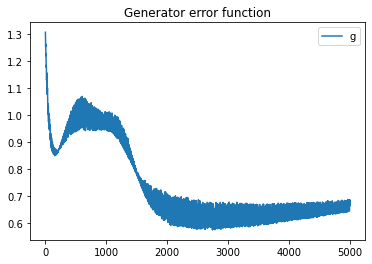

Text(0.5, 1.0, 'Discriminator error function')

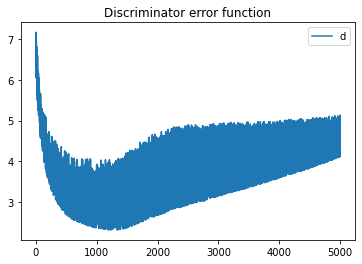

In [ ]:
import matplotlib.pyplot as plt
plt.plot(errors_generator)
plt.title("Generator error function")
plt.legend("gen")
plt.show()
plt.plot(errors_discriminator)
plt.legend('disc')
plt.title("Discriminator error function")

[0.9800524  0.02085431 0.01985185 0.95898167]
[0.9815217  0.02001837 0.01893816 0.96212929]
[0.9632014  0.0289726  0.02898544 0.92279366]
[0.97038881 0.02577285 0.02533327 0.93821872]


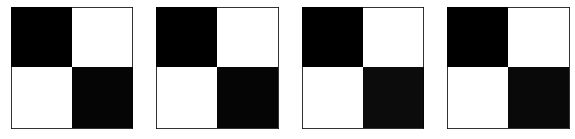

In [ ]:
generated_images = []
for i in range(4):
    z = random.random()
    generated_image = G.forward(z)
    generated_images.append(generated_image)
_ = view_samples(generated_images, 1, 4)
for i in generated_images:
    print(i)